In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.lib import weights


In [ ]:
df = pd.read_csv("Data_Housing_Madrid.csv")






In [11]:
df

,Unnamed: 0,house.price,RP,crime,built.area,age,retired,children,immigrants,shopping,...,type.house,floor,good.cond,garage,elevator,air.cond,swimming.pool,M.30,longitude,latitude
0,11548,3571.0,0.26,0.41,70,40.000000,20.782415,12.640324,13.430590,0,...,piso,primera,bueno,no,no,ZZZ,ZZZ,0,-3.656538,40.431302
1,7700,3115.0,0.14,0.28,61,40.000000,16.948582,14.204219,7.080645,0,...,piso,seg.-terc.,bueno,no,no,si,no,0,-3.721426,40.482340
2,6271,2940.0,0.15,0.27,92,40.000000,22.220937,13.086284,7.956299,0,...,piso,seg.-terc.,a_reformar,no,si,no,no,0,-3.647869,40.408970
3,1620,2811.0,0.20,0.35,65,40.000000,12.398586,16.426238,6.552713,0,...,piso,cuar.-quinta,bueno,ZZZ,no,si,ZZZ,0,-3.754118,40.374849
4,3500,3808.0,0.17,0.30,130,15.000000,20.782415,12.640324,13.430590,0,...,piso,seg.-terc.,bueno,no,si,ZZZ,si,0,-3.670743,40.481328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,11313,2760.0,0.26,0.41,75,30.000000,22.752651,10.208239,9.660205,0,...,piso,seg.-terc.,bueno,no,no,si,no,0,-3.644650,40.427471
10508,2511,3196.0,0.45,0.44,76,2.500000,12.625268,18.374019,9.042113,0,...,piso,ZZZ,bueno,si,no,no,si,0,-3.593624,40.399559
10509,10824,1600.0,0.42,0.31,427,2.500000,15.625218,15.546906,7.532427,1,...,chalet,seg.-terc.,bueno,si,no,si,si,0,-3.628750,40.476121
10510,7803,6341.0,0.18,0.32,414,14.862265,15.625218,15.546906,7.532427,1,...,chalet,ZZZ,bueno,si,no,si,si,0,-3.701934,40.476105


In [12]:
df = df[["house.price", "historical", "longitude", "latitude"]]
df


,house.price,historical,longitude,latitude
0,3571.0,0,-3.656538,40.431302
1,3115.0,0,-3.721426,40.482340
2,2940.0,0,-3.647869,40.408970
3,2811.0,0,-3.754118,40.374849
4,3808.0,0,-3.670743,40.481328
...,...,...,...,...
10507,2760.0,0,-3.644650,40.427471
10508,3196.0,0,-3.593624,40.399559
10509,1600.0,0,-3.628750,40.476121
10510,6341.0,0,-3.701934,40.476105


In [13]:
df_historical = df[df["historical"]==1]
df_historical

,house.price,historical,longitude,latitude
6,3462.0,1,-3.694925,40.410263
7,7540.0,1,-3.679605,40.443142
9,3134.0,1,-3.694564,40.404596
11,5229.0,1,-3.701538,40.409841
12,4583.0,1,-3.686680,40.398488
...,...,...,...,...
10491,4390.0,1,-3.672355,40.401933
10500,4200.0,1,-3.697324,40.398123
10501,6909.0,1,-3.675957,40.422285
10502,3529.0,1,-3.704007,40.407521


In [14]:
df_historical["house.price"].median()

4444.0

In [15]:
df_historical["house.price"].max()

20131.0

In [22]:
gdfm_historical = gpd.GeoDataFrame(df_historical, geometry=gpd.points_from_xy(df_historical.longitude, df_historical.latitude), crs="EPSG:4326")
w_hy = weights.distance.DistanceBand.from_dataframe(gdfm_historical, threshold=0.00225, alpha=-1, binary=False)



c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_data.py:134: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\util.py:826: UserWarning: The weights matrix is not fully connected: 
 There are 140 disconnected components.
 There are 106 islands with ids: 20, 88, 279, 299, 363, 377, 430, 705, 826, 866, 923, 932, 1062, 1119, 1150, 1190, 1232, 1255, 1298, 1432, 1537, 1582, 1758, 2041, 2078, 2095, 2102, 2370, 2429, 2601, 2716, 3028, 3076, 3244, 3298, 3411, 3437, 3615, 3694, 3726, 3830, 4100, 4124, 4188, 4193, 4228, 4279, 4408, 4681, 4726, 4735, 4775, 4828, 4845, 5011, 5404, 5423, 5441, 5469, 5847, 6008, 6019, 6046, 6124, 6279, 6313, 6489, 6535, 6961, 6993, 7186, 7215, 7366, 7538, 7693, 7803, 7841, 7914, 7942, 8080, 8220, 8241, 8674, 8694, 8823, 8916, 8950, 9140, 9171, 9267, 9458, 9617, 9695, 9771, 9790, 9866, 9934, 99

In [24]:
w_hy.transform="R"

('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 88, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 299, ' is an island (no neighbors)')
('WARNING: ', 363, ' is an island (no neighbors)')
('WARNING: ', 377, ' is an island (no neighbors)')
('WARNING: ', 430, ' is an island (no neighbors)')
('WARNING: ', 705, ' is an island (no neighbors)')
('WARNING: ', 826, ' is an island (no neighbors)')
('WARNING: ', 866, ' is an island (no neighbors)')
('WARNING: ', 923, ' is an island (no neighbors)')
('WARNING: ', 932, ' is an island (no neighbors)')
('WARNING: ', 1062, ' is an island (no neighbors)')
('WARNING: ', 1119, ' is an island (no neighbors)')
('WARNING: ', 1150, ' is an island (no neighbors)')
('WARNING: ', 1190, ' is an island (no neighbors)')
('WARNING: ', 1232, ' is an island (no neighbors)')
('WARNING: ', 1255, ' is an island (no neighbors)')
('WARNING: ', 1298, ' is an island (no neighbors)')
('WARNING: ', 1432, ' is a

In [28]:
import numpy as np
type(w_hy)
medianos = np.median(list(w_hy.cardinalities.values()))
medianos

21.0

In [30]:
from esda.moran import Moran

moran = Moran(gdfm_historical["house.price"], w_hy)

print("I de Moran:", moran.I.round(3))
print("p-valor:", moran.p_sim)

I de Moran: 0.326
p-valor: 0.001


Para interpretar la I de Moran y su p-valor, hay que seguir estas reglas:

Si I de Moran es positiva y el p-valor es bajo (p < 0.05):
→ Existe autocorrelación espacial significativa
→ Sí ayuda a estimar el precio de una vivienda con base en las viviendas vecinas.

Si I de Moran es cercana a 0 y el p-valor es alto (p > 0.05):
→ No hay autocorrelación espacial significativa
→ No ayuda a estimar el precio con base en las viviendas vecinas.

Si I de Moran es negativa y significativa (p < 0.05):
→ Los precios están dispersos en lugar de agrupados
→ Puede significar que las viviendas baratas están cerca de caras (patrón de heterogeneidad).

Si el p-valor es intermedio (ej. 0.05 < p < 0.10):
→ La evidencia no es fuerte
→ No es posible determinar con certeza si hay o no relación espacial.

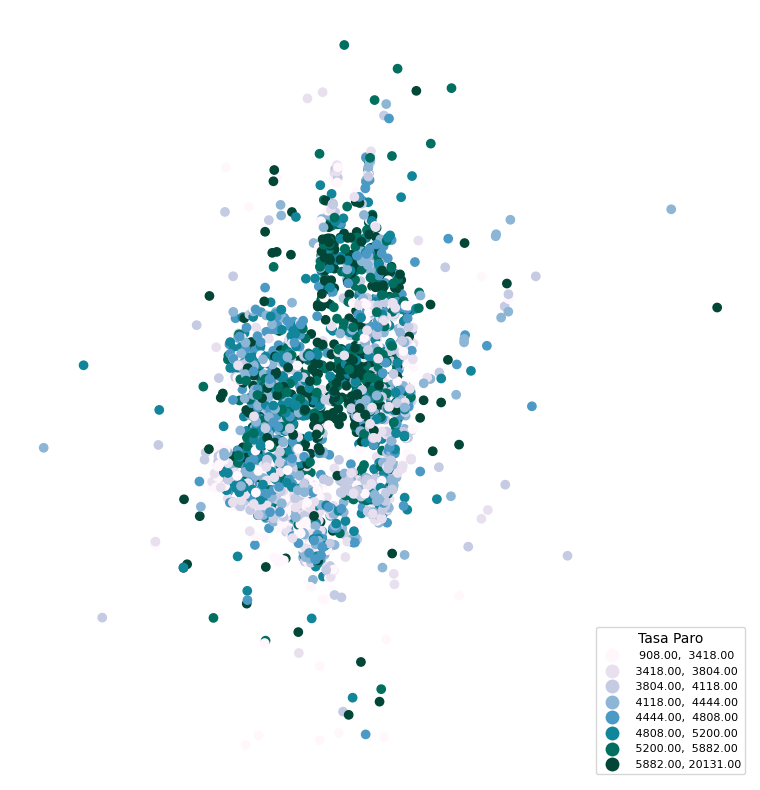

In [ ]:


map=gdfm_historical.plot(column='house.price', 
         scheme='quantiles',
         k=8, cmap='PuBuGn',
         legend=True,
         figsize=(10,10),
         legend_kwds={'loc': 'lower right', 'fontsize':'8', 'title':'Tasa Paro'} 
)
map.set_axis_off() 